In [4]:
from base import BasePlotter, np, plt
# import importlib
# import oneD
# importlib.reload(oneD)
from oneD import Solver1D, FluxMap1D
# Apply rcParams configuration
BasePlotter.configure_rc_params()

# Export figures to Folder
figures_path = "../TFG_latex/Figures/FluxMap1D/"

# Generalising Step Concentrations

Concentration profile described by a midstep with varying starting positions ($x_0$) and lenghts ($l$), with the restriction $x_0 + l \leq L$.

$$
c_{\text{midstep}}(x; x_0,l) = 
\begin{cases} 
\frac{1}{l} & \text{if } x_0 \leq x \leq x_0 + l, \\
0 & \text{otherwise}.
\end{cases}
$$

In [5]:
def midstep_generator(x0, l):
    'Define the inner step function that takes x as parameter'
    def c_midstep(x):
        'Determine the condition based on x0 and l'
        cond = (x >= x0) & (x <= x0 + l)
        # Return 1/l where the condition is True, otherwise return 0
        return np.where(cond, 1 / l, 0)
    
    return c_midstep

In [ ]:
syst_params = {
    'L' : 1.0, 'Tc': None,
    'nx':  1000, # nx: Weird triangles appear if it's too low
    'n_x0' : 500,
    'n_l' : 500
}

### 1. Comparable Consumption & Diffusion ($T_c \sim 1$)

ODEs solved: 100%|██████████| 124751/124751 [00:41<00:00, 3027.68it/s]


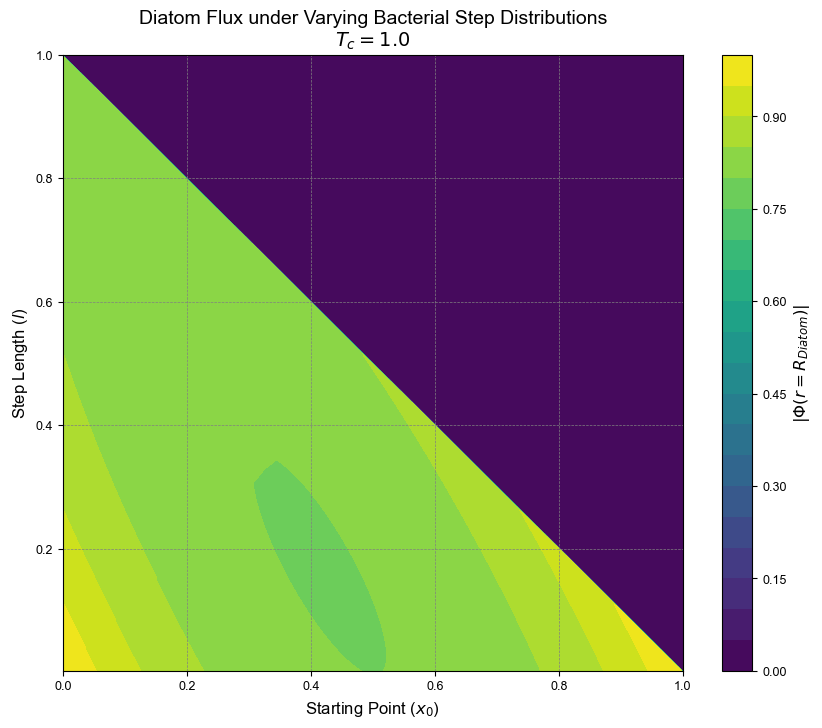

In [ ]:
syst_params['Tc'] = 1
FM_comp = FluxMap1D(syst_params, midstep_generator)
FM_comp.solve(n_jobs=-1)
FM_comp.plot()

### 2. Diffusion Domination ($T_c \ll 1$)

ODEs solved: 100%|██████████| 124751/124751 [00:44<00:00, 2783.92it/s]


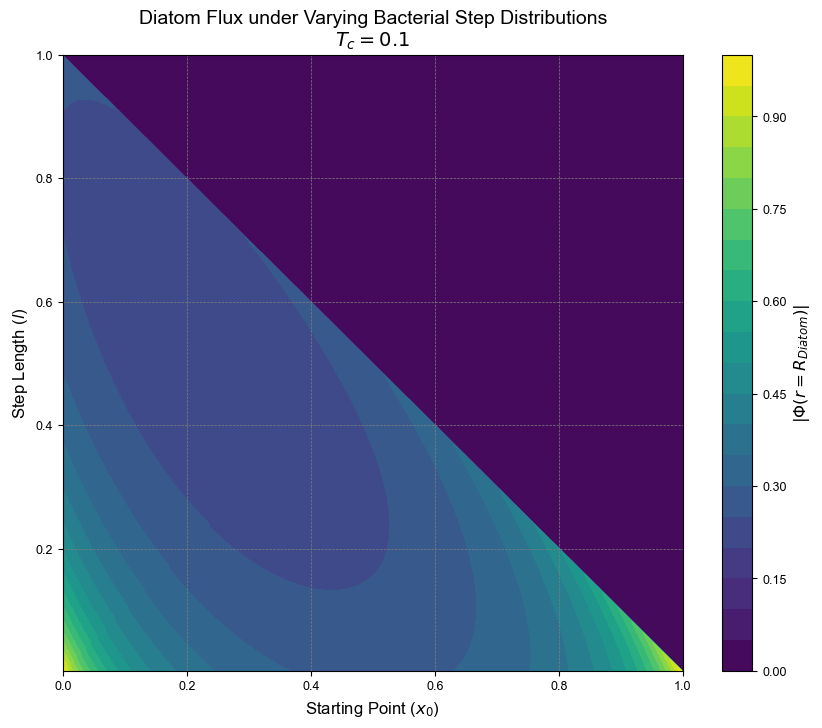

In [4]:
syst_params['Tc'] = 0.1
FM_diff = FluxMap1D(syst_params, midstep_generator)
FM_diff.solve(n_jobs=-1)
FM_diff.plot()

In [2]:
# syst_params['Tc'] = 0.01
# FM_diff2 = FluxMap1D(syst_params, midstep_generator)
# FM_diff2.solve(n_jobs=-1); FM_diff2.plot()

### 3. Consumption Domination ($T_c \gg 1$)

ODEs solved: 100%|██████████| 124751/124751 [00:20<00:00, 5993.12it/s]


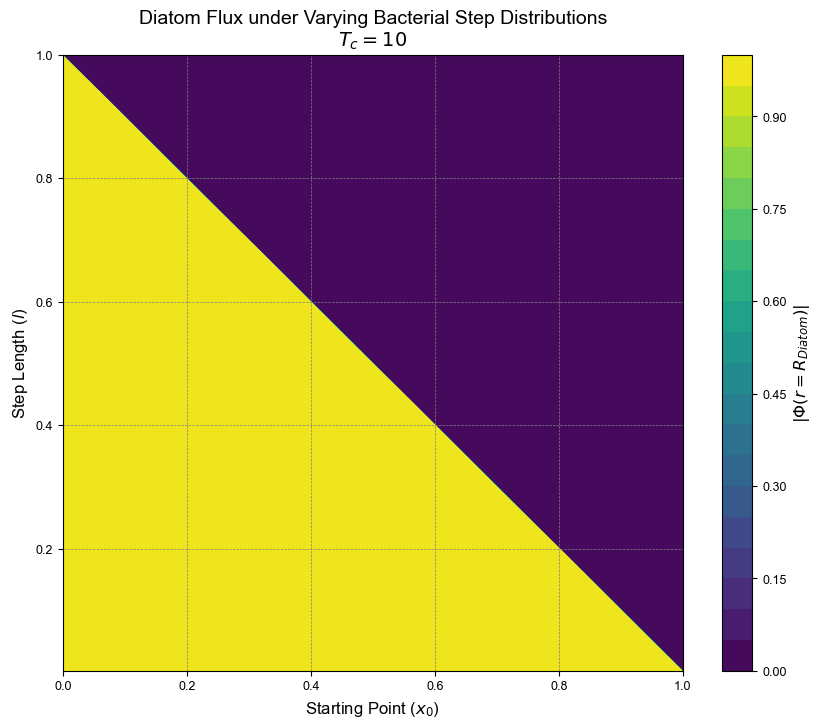

In [6]:
syst_params['Tc'] = 10
FM_abs = FluxMap1D(syst_params, midstep_generator)
FM_abs.solve(n_jobs=-1)
FM_abs.plot()

___
### 4. Set of Step Concentration

C:\Users\jorge\AppData\Local\Temp\ipykernel_33024\3191859970.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  return np.where(cond, 1 / l, 0)


ValueError: could not broadcast input array from shape (500,) into shape (1000,)

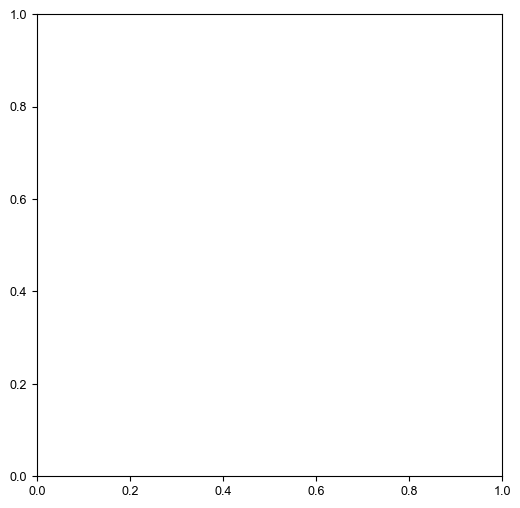

In [ ]:
base = BasePlotter()
base.configure_rc_params()

FM = FluxMap1D(syst_params, None)

# def compute_flux_profile(syst_params, step_generator):
'Compute the flux profile for a given set of system parameters and step generator'
L = syst_params['L']
nx = syst_params['nx']
n_l = syst_params['n_l']
n_x0 = syst_params['n_x0']

# Generate the x0 and l values
x0_values = np.linspace(0, L, n_x0)
l_values = np.linspace(0, L, n_l)
# Initialize the array to store the profile values
c_dist_values = np.zeros((nx, n_x0, n_l))

# Create the figure for the bacteria distribution and flux
base.fig, ax = plt.subplots(1, 1, figsize=(6, 6))
cmap = plt.get_cmap('viridis')

for i, x0 in enumerate(x0_values):
    for j, l in enumerate(l_values):
        # Create the step function for the current x0 and l
        c_step = step_generator(x0, l)
        # Store the computed profile value
        # Ensure the output shape matches the expected shape
        c_dist_values[:, i, j] = c_step(FM.x_values)

c_dist_values = c_dist_values.reshape(nx, n_x0*n_l)

# Plot the bacteria distribution
for i in range(n_x0*n_l):
    colour = cmap(i / (n_x0*n_l))
    ax.plot(FM.x_values, c_dist_values[:, i], color=colour, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('c(x)')
ax.set_title('Step Bacterial Distribution')

# compute_flux_profile(syst_params, midstep_generator)



In [14]:
syst_params['nx'], FM.x_values.shape

(1000, (500,))